In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(1)

In [3]:
# functiom for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()
    
    # Data
    x1 = data_set.x[:,0].view(-1,1).numpy()
    x2 = data_set.x[:,1].view(-1,1).numpy()
    y = data_set.y.numpy()
    
    # make plane
    X,Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b
    
    # plotting
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    
    ax.plot(x1[:,0], x2[:,0], y[:,0], 'ro', label = 'y') # scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    
    plt.title('estimate plane iterations:' + str(n))
    ax.legend()
    
    plt.show()
            

In [4]:
# create a 2D dataset

class Data2D(Dataset):
    
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:,0] = torch.arange(-1, 1, 0.1)
        self.x[:,1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w)  + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len


In [5]:
data_set = Data2D()

In [6]:
# create a customized linear

class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
model = linear_regression(2,1)
print('The parameters:', list(model.parameters()))

The parameters: [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


In [8]:
# optimizer, loss and dataloader

optimizer = optim.SGD(model.parameters(), lr=0.1)

criterion = nn.MSELoss()

trainloader = DataLoader(dataset = data_set, batch_size=2)

Before Training: 


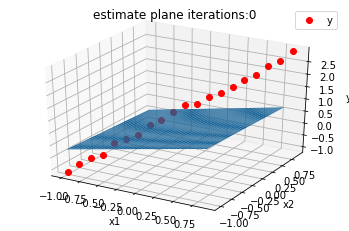

After Training: 


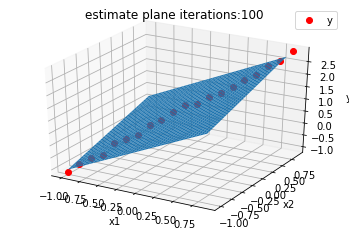

In [9]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Total loss')

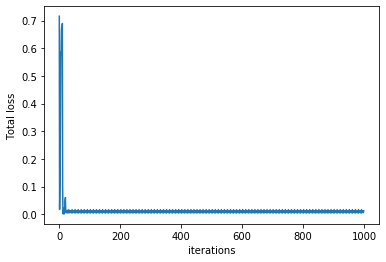

In [10]:
plt.plot(LOSS)
plt.xlabel('iterations')
plt.ylabel('Total loss')

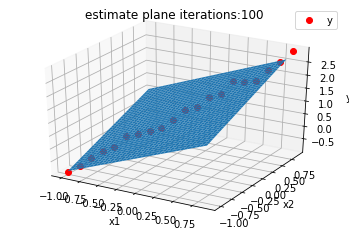

Text(0, 0.5, 'total loss')

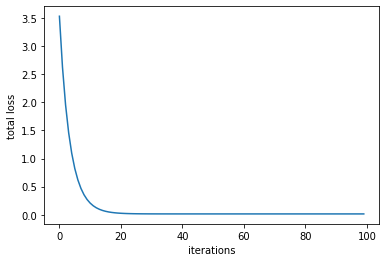

In [11]:
data_set = Data2D()

train_loader = DataLoader(dataset = data_set, batch_size=30)
model1 = linear_regression(2,1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

LOSS1 = []
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            yhat = model1(x)
            loss = criterion(yhat,y)
            LOSS1.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
train_model(epochs)
Plot_2D_Plane(model1, data_set, epochs)
plt.plot(LOSS1)
plt.xlabel('iterations')
plt.ylabel('total loss')